## Fish Weight Modeling for Market Insights

In [1]:
## Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [2]:
 # Step 2: Load Dataset
df = pd.read_csv("Fish.csv")  # replace with your file path

# First 5 rows
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
#Step 3: Explore Dataset
# Shape & columns
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
df.describe().T

Shape: (159, 7)

Columns:
 Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

Missing values:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


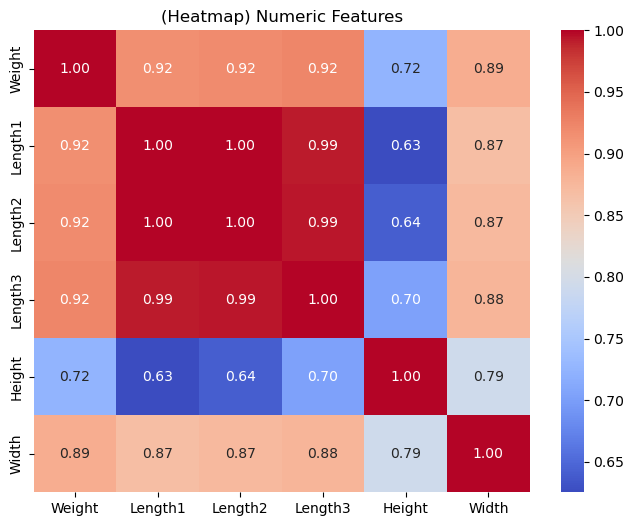

In [7]:
# Step 4: Visualizations
# Histograms of numeric features
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("(Heatmap) Numeric Features")
plt.show()


In [8]:
# Step 5: Data Preprocessing
# Encode categorical feature: Species
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)

# Features and target
X = df_encoded.drop(columns=['Weight'])
y = df_encoded['Weight']

# Train-Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (127, 11)
Test size : (32, 11)


In [9]:
# Step 6: Feature Engineering
# Create interaction term between Length and Height or Width if needed
X_train['Length_Height'] = X_train['Length1'] * X_train['Height']
X_test['Length_Height'] = X_test['Length1'] * X_test['Height']

In [10]:
# Step 7: Train Regression Models
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [11]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [12]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

C:\Users\bbuser\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+05, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


In [13]:
# Polynomial Regression (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [14]:
#Step 8: Evaluate Models
def evaluate_model(name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Polynomial Regression", y_test, y_pred_poly)

Linear Regression -> RMSE: 58.72, R²: 0.976
Ridge Regression -> RMSE: 50.02, R²: 0.982
Lasso Regression -> RMSE: 57.86, R²: 0.976
Polynomial Regression -> RMSE: 68.41, R²: 0.967


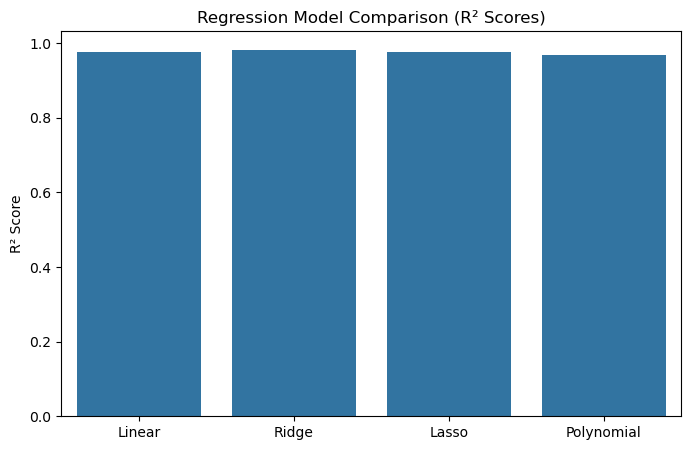

In [15]:
# Step 9: Compare Model Performance
models = ["Linear", "Ridge", "Lasso", "Polynomial"]
r2_scores = [
    r2_score(y_test, y_pred_lin),
    r2_score(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_poly)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores)
plt.title("Regression Model Comparison (R² Scores)")
plt.ylabel("R² Score")
plt.show()

## Task Is Done